https://www.kaggle.com/c/instacart-market-basket-analysis/data

'order_dow' is the day of week.

In [125]:
import os
import pandas as pd
import numpy as np
import zipfile


#libraries for data visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
%matplotlib inline
import seaborn as sns
sns.set_palette('Set2')
sns.set_color_codes("pastel")

In [2]:
folder = "/Users/reejungkim/Documents/instacart-market-basket-analysis"

os.listdir(folder)

['order_products__prior.csv.zip',
 '.DS_Store',
 'order_products__train.csv.zip',
 'aisles.csv.zip',
 'orders.csv.zip',
 'departments.csv.zip',
 'products.csv.zip',
 'sample_submission.csv.zip']

In [3]:

for file in os.listdir(folder):
    if file.endswith(".zip"):
        zip_file = folder + "/"+ file
        zf = zipfile.ZipFile(zip_file)
        
        x = str(file[:-8])
        print("\n"+ x)
        globals()[x] = pd.read_csv(zf.open(file[:-4])) #, index_col=0)

        display((globals()[x]).head())


order_products__prior


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0



order_products__train


,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1



aisles


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation



orders


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0



departments


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol



products


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13



sample_submission


,order_id,products
0,17,39276 29259
1,34,39276 29259
2,137,39276 29259
3,182,39276 29259
4,257,39276 29259


# EDA

https://gist.github.com/goodvc78/3653c8f6a510f619d7ad6570111f38d8

In [4]:
def toReadable(v):
    value = round(v,2) if isinstance(v, float) else v

    if value < 1000:
        return str(value)
    elif value<1000000:
        return str(round(value/1000,1))+'K'
    elif value>=1000000:
        return str(round(value/1000000,1))+'M'
    return value

In [5]:

total_user = len(orders.user_id.unique())
total_order = len(orders)
total_ordered_product = len(order_products__prior)
unique_products = len(order_products__prior.product_id.unique())

print("total user = {}".format(toReadable(total_user)))
print("total order = {} ({} orders per a user )".format(toReadable(total_order), toReadable(total_order/total_user) ))
print("total product = ", toReadable(unique_products))
print("total ordered product  = {} ({} orders per a product )".format(
    toReadable(total_ordered_product), toReadable(total_ordered_product/unique_products) ))

total user = 206.2K
total order = 3.4M (16.59 orders per a user )
total product =  49.7K
total ordered product  = 32.4M (652.91 orders per a product )


In [6]:
index2day = "Sun Mon Tue Wed Thu Fri Sat".split()

In [7]:
index2day

['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']

In [9]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [42]:
orders_per_dow = orders.pivot_table(index='order_dow',
                  values='order_id', 
                  aggfunc='count')

In [43]:
orders_per_dow.index = index2day

orders_per_dow.reset_index(inplace=True)

In [45]:
orders_per_dow

,order_id
Sun,600905
Mon,587478
Tue,467260
Wed,436972
Thu,426339
Fri,453368
Sat,448761


<AxesSubplot:ylabel='order_id'>

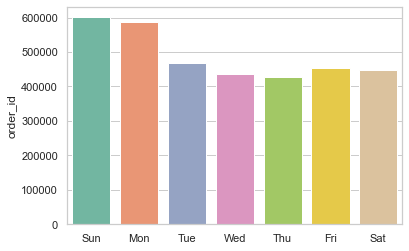

In [126]:
sns.barplot(x=orders_per_dow.index, y="order_id", data=orders_per_dow)

In [110]:
orders_per_hod = orders.pivot_table(index='order_dow',
                    columns='order_hour_of_day',
                    values='order_id', 
                    aggfunc='count')  #aggfunc=lambda x: len(x)/1000)
    
orders_per_hod.index = index2day
orders_per_hod

order_hour_of_day,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Sun,3936,2398,1409,963,813,1168,3329,12410,28108,40798,...,54552,53954,49463,39753,29572,22654,18277,14423,11246,6887
Mon,3674,1830,1105,748,809,1607,5370,16571,34116,51908,...,46764,46403,44761,36792,28977,22145,16281,11943,8992,5620
Tue,3059,1572,943,719,744,1399,4758,13245,24635,36314,...,37173,37469,37541,32151,26470,20084,15039,10653,8146,5358
Wed,2952,1495,953,654,719,1355,4562,12396,22553,32312,...,34773,35990,35273,30368,25001,19249,13795,10278,8242,5181
Thu,2642,1512,899,686,730,1330,4401,12493,21814,31409,...,33625,34222,34093,29378,24425,19350,14186,10796,8812,5645
Fri,3189,1672,1016,841,910,1574,4866,13434,24015,34232,...,37407,37508,35860,29955,24310,18741,13322,9515,7498,5265
Sat,3306,1919,1214,863,802,1136,3243,11319,22960,30839,...,38748,38093,35562,30398,24157,18346,13392,10501,8532,6087


In [119]:
orders_per_hod = orders.pivot_table(index=['order_dow','order_hour_of_day'],
                    values='order_id', 
                    aggfunc='count')

orders_per_hod.reset_index(inplace=True)
orders_per_hod

,order_dow,order_hour_of_day,order_id
0,0,0,3936
1,0,1,2398
2,0,2,1409
3,0,3,963
4,0,4,813
...,...,...,...
163,6,19,18346
164,6,20,13392
165,6,21,10501
166,6,22,8532


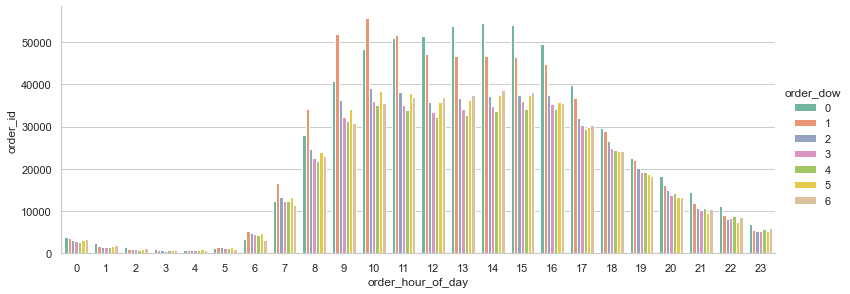

In [127]:
sns.catplot(x='order_hour_of_day', 
            y="order_id", 
            data=orders_per_hod, 
            hue='order_dow',
           kind='bar',
           height=4, aspect=2.7)

In [123]:
def drawWeekHour(ds, values,  aggfunc=len, title=None, figsize=(18,5) , cmap=None):
    weekhour_ds = ds.pivot_table(index='order_dow', columns='order_hour_of_day', values=values, aggfunc=aggfunc).fillna(0)
    weekhour_ds.index =  [  index2day[index] for index in weekhour_ds.index]
    sns.set(style="whitegrid", palette="colorblind", font_scale=1 )

    plt.figure(figsize=figsize)
    f = sns.heatmap(weekhour_ds, annot=True, fmt="1.1f", linewidths=.5, cmap=cmap) 
    plt.xlabel("Hour")
    plt.ylabel("Day of Week")
    if title:
        plt.title(title, fontsize=15)

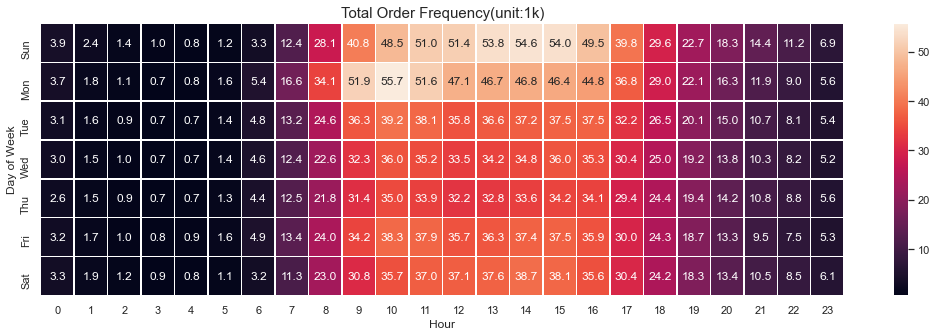

In [124]:
drawWeekHour(orders, values='order_id', title="Total Order Frequency(unit:1k)", aggfunc=lambda x: len(x)/1000)

In [128]:
order_products__prior.reordered.unique()#value_counts

array([1, 0])

In [129]:
df = order_products__prior.merge(orders, how='left', on='order_id')
df.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,202279,prior,3,5,9,8.0
1,2,28985,2,1,202279,prior,3,5,9,8.0
2,2,9327,3,0,202279,prior,3,5,9,8.0
3,2,45918,4,1,202279,prior,3,5,9,8.0
4,2,30035,5,0,202279,prior,3,5,9,8.0


In [130]:
df = df.merge(products, how='left', on='product_id')
df.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id
0,2,33120,1,1,202279,prior,3,5,9,8.0,Organic Egg Whites,86,16
1,2,28985,2,1,202279,prior,3,5,9,8.0,Michigan Organic Kale,83,4
2,2,9327,3,0,202279,prior,3,5,9,8.0,Garlic Powder,104,13
3,2,45918,4,1,202279,prior,3,5,9,8.0,Coconut Butter,19,13
4,2,30035,5,0,202279,prior,3,5,9,8.0,Natural Sweetener,17,13


df.product_name.value_counts

In [131]:
df = df.merge(departments, how='left', on='department_id')
df.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,department
0,2,33120,1,1,202279,prior,3,5,9,8.0,Organic Egg Whites,86,16,dairy eggs
1,2,28985,2,1,202279,prior,3,5,9,8.0,Michigan Organic Kale,83,4,produce
2,2,9327,3,0,202279,prior,3,5,9,8.0,Garlic Powder,104,13,pantry
3,2,45918,4,1,202279,prior,3,5,9,8.0,Coconut Butter,19,13,pantry
4,2,30035,5,0,202279,prior,3,5,9,8.0,Natural Sweetener,17,13,pantry


df.pivot_table(index='department', values=['add_to_cart_order', 'reordered'],aggfunc=np.sum, margins=True )

In [132]:
pd.DataFrame(df.groupby('order_id').department.agg(lambda x: x.tolist())).reset_index()


,order_id,department
0,2,"[dairy eggs, produce, pantry, pantry, pantry, ..."
1,3,"[dairy eggs, dairy eggs, produce, produce, dai..."
2,4,"[bakery, personal care, snacks, breakfast, bre..."
3,5,"[produce, pantry, deli, produce, dairy eggs, h..."
4,6,"[beverages, household, household]"
...,...,...
3214869,3421079,[personal care]
3214870,3421080,"[dairy eggs, frozen, beverages, produce, produ..."
3214871,3421081,"[snacks, bakery, pantry, dairy eggs, canned go..."
3214872,3421082,"[meat seafood, dairy eggs, produce, produce, d..."


frequent_itemsets = pd.DataFrame(df.groupby('order_id').product_name.agg(lambda x: x.tolist())).reset_index()

frequent_itemsets['support']=1
frequent_itemsets.head()

frequent_itemsets = frequent_itemsets.rename(columns={"product_name": "itemsets"})

#!conda install mlxtend --channel conda-forge
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules


association_rules(frequent_itemsets, metric="lift", min_threshold=.05, support_only=True)

basket = df.groupby(['order_id', 'product_name'])['order_number'].sum().unstack()
basket = basket.fillna(0)
basket

apriori(basket_sets, min_support=0.07, use_colnames=True)